In [29]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial
import pandas as pd
import pickle
import progress
from scipy.optimize import curve_fit
from scipy.optimize import minimize

In [30]:
with open('df.pickle','rb') as file:
    df = pickle.load(file)
df.head()

""


In [78]:
def filter_size(dataframe,n):
    output = pd.DataFrame()
    for row in dataframe.iterrows():
        if len(row[1].dropna()) >= n:
            series = row[1]
            output = output.append(pd.Series(series,name = series.name), ignore_index=True)
    return output

df = filter_size(df,5)

df

,0 days,1 days,2 days,3 days,4 days,5 days,6 days,7 days,8 days,9 days,...,4618 days,4660 days,4702 days,4716 days,4719 days,4720 days,4873 days,4877 days,4900 days,5327 days
0,15.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438,1.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3439,1.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3440,1.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3441,1.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


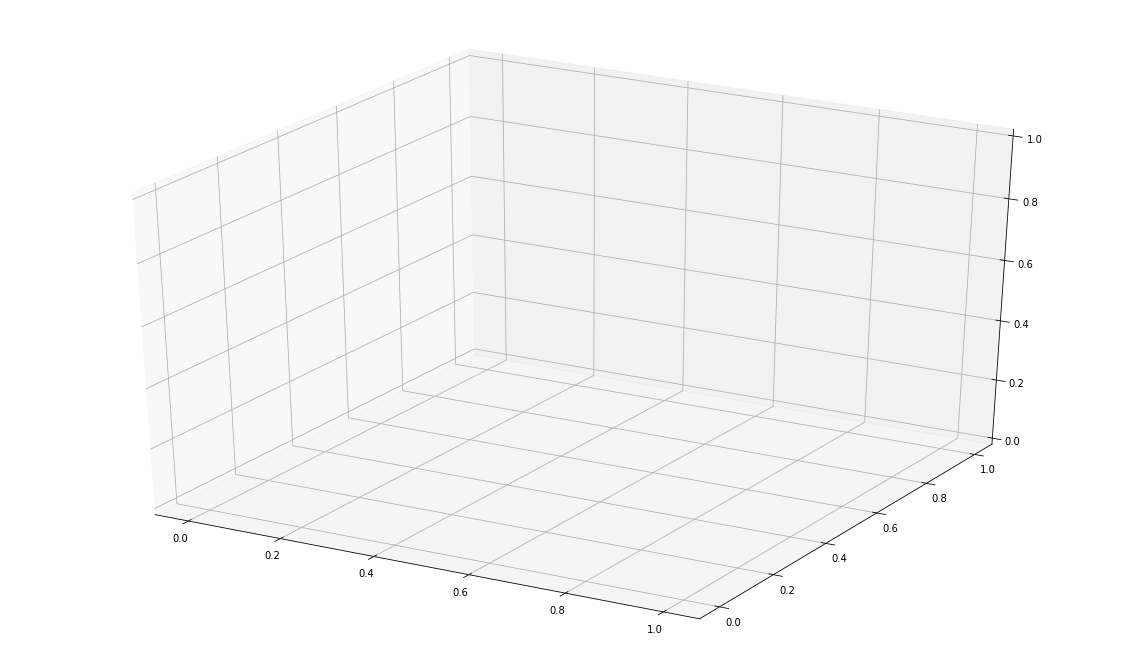

In [18]:
d = df.iloc[:,:]

dat = d.to_numpy()
col = np.linspace(1,len(d.columns),len(d.columns))
ind = np.linspace(0,len(d.index)-1,len(d.index))


X = np.array([[i for e in col] for i in ind])
Y = np.array([col for i in ind])
Z = dat

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z)
plt.show()

In [10]:
import warnings

a = d.iloc[500:501,:].dropna(axis=1)
dat = a.to_numpy()[0]
ind = a.columns.to_numpy() / np.timedelta64(1, 'D')

def poly(params,indep):
    p = Polynomial(params[::-1])
    return p(indep)

n = len(dat)
for i in range(len(dat)-1):
    with warnings.catch_warnings(record=True) as w:
        x = np.polyfit(ind,dat,27)
        if not issubclass(w[-1].category, np.RankWarning):
            break


fig, ax = plt.subplots()
ax.plot(ind,dat)
ax.plot(ind,poly(x,ind))
plt.show()

NameError: name 'd' is not defined

In [69]:
f

array([ 7.15224817e-88, -4.19989627e-84, -6.87977933e-81,  3.06445575e-77,
        1.77869363e-73,  2.17433598e-70, -1.63404345e-66, -9.08327380e-63,
       -9.09164841e-60,  1.02189435e-55,  4.49850756e-52, -3.39042951e-49,
       -7.55381881e-45, -5.47598628e-42,  1.14299374e-37,  1.61833128e-35,
       -1.85468353e-30,  7.08665443e-27, -1.47216983e-23,  2.04712919e-20,
       -2.06177065e-17,  1.55003693e-14, -8.62284768e-12,  3.38888250e-09,
       -8.62242108e-07,  1.18237794e-04, -3.27866761e-03,  1.15917183e+01])

In [119]:
d = df.iloc[7000:,:]
x = np.linspace(0,3501,36)
df = pd.DataFrame()
progress.update(0)
c = 0
l = len(d)
for index, data in d.iterrows():
    vector = data.dropna().to_numpy()
    n = len(vector)
    if n >= 10:
        xs     = data.dropna().index.to_numpy() / np.timedelta64(1, 'D')
        for i in range(n-1):
            with warnings.catch_warnings(record=True) as w:
                params = np.polyfit(xs,vector,n-i)
                fitted = poly(params,x)
                if not issubclass(w[-1].category, np.RankWarning):
                    break
            n -= 1
        dictio = {}
        for a, b in zip(x,fitted):
            dictio[a] = b
        series = pd.Series(dictio,name = index)
        df = df.append(series)
    c += 1
    progress.update(i/l)
df.head()

Progress: [--------------------] 0.0% 


""


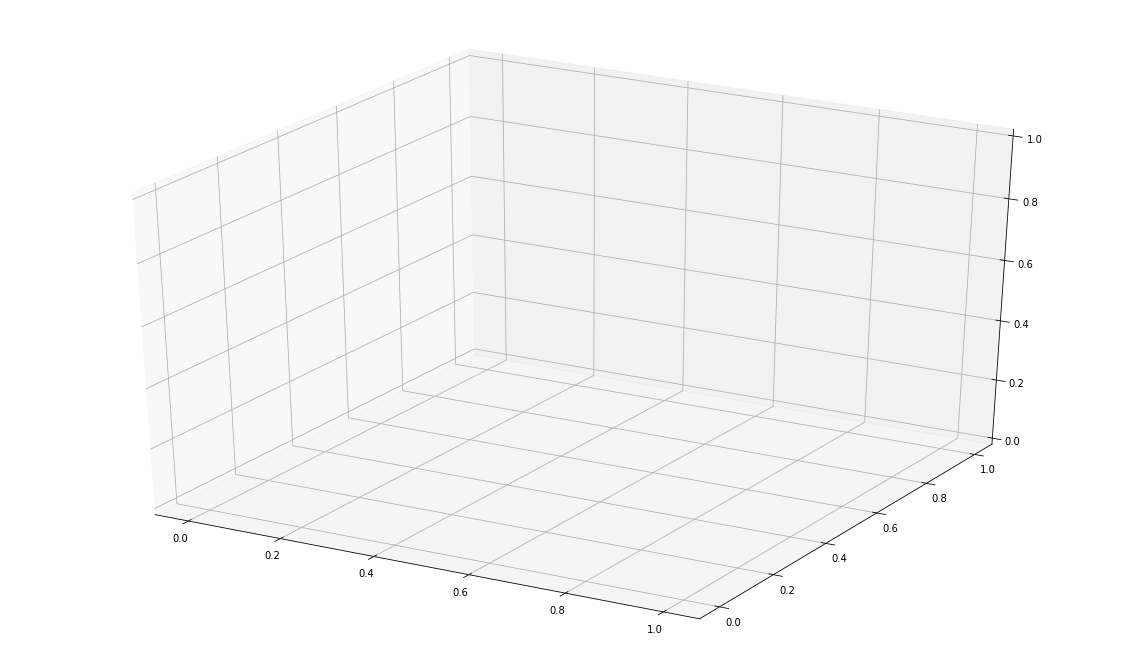

In [110]:
d = df.iloc[:,:]

dat = d.to_numpy()
col = np.linspace(1,len(d.columns),len(d.columns))
ind = np.linspace(0,len(d.index)-1,len(d.index))


X = np.array([[i for e in col] for i in ind])
Y = np.array([col for i in ind])
Z = dat

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z)
plt.show()

In [58]:
df.to_pickle('oi.pickle')

In [74]:
data = pd.DataFrame()
i = 0
for row in df.iterrows():
    i += 1
    series = row[1]
    data = data.append(pd.Series(series,name=row[0]), ignore_index=True)
    if i == 1:
        break

In [62]:
data

,0 days,1 days,2 days,3 days,4 days,5 days,6 days,7 days,8 days,9 days,...,4618 days,4660 days,4702 days,4716 days,4719 days,4720 days,4873 days,4877 days,4900 days,5327 days
0,18.714775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


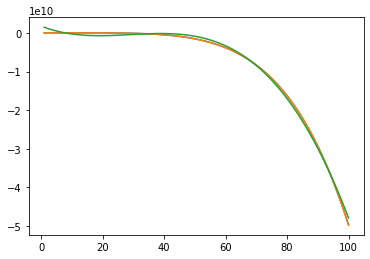

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial


def fun(ind):
    return -5*x**5 + 3*x**4 + x**3 + 2*x**2 + 5*x - 10

def poly(params,indep):
    p = Polynomial(params[::-1])
    return p(indep)


x = np.linspace(1,100,101)
y = fun(x)
p = np.polyfit(x,y,5)
ps = np.polyfit(x,y,3)

plt.plot(x,y)
plt.plot(x,poly(p,x))
plt.plot(x,poly(ps,x))
plt.show()